In [1]:
# Primary purpose is to write out cubes of dark-subtracted, flat-fielded frames

# Made from Dillon's parent notebook 2022 Aug 25 by E.S.

In [1]:
import os
from os import listdir
from os.path import isfile,join
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import fits

In [23]:
#This is just setting up my filepaths; you should replace them with wherever your folders are

## BEGIN USER INPUTS
stem = "/Users/bandari/Documents/git.repos/gpi2_misc/data/"
string_gain = "High" # for printing and file paths
fps_flat = int(30) # integration time of flats to use (note that linearity and dark frames have several integration times)
## END USER INPUTS

path_gain_flats = stem + "Pupil_Plane_Images/"+string_gain+"_Gain/Flats_("+str(fps_flat)+"_FPS)/"
path_gain_darks = stem + "Pupil_Plane_Images/"+string_gain+"_Gain/Darks_(FPS)/"
path_gain_lin = stem + "Pupil_Plane_Images/"+string_gain+"_Gain/Linearity_images_(FPS)/"
'''
darks_folders = sorted(listdir(path_low_darks), key = lambda x: int(os.path.splitext(x)[0]))
lin_folders = sorted(listdir(path_low_lin), key = lambda x: int(os.path.splitext(x)[0]))
'''

flat_files = glob.glob(path_gain_flats + "*.raw")
dirs_darks_list = glob.glob(path_gain_darks + "*[0-9]")
darks_folders = [os.path.basename(i) for i in dirs_darks_list]

'''
print (darks_folders)
print (lin_folders)
print (flat_files)
'''

'\nprint (darks_folders)\nprint (lin_folders)\nprint (flat_files)\n'

In [24]:
# sorted list of integration times

cadence_array = np.sort(np.array(darks_folders).astype(int))
exp_time_array = np.divide(1.,cadence_array)

In [25]:
cadence_array

array([ 15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,
        80,  85,  90,  95, 100, 105, 110])

## Creating Master Dark frames for each exposure time
## (Accumulated into cube)

In [5]:
#This code just runs through the files in each folder for the darks, and creates a master dark for each FPS

array_list_darks = []     # This is the final output of this block

# loop over integration times
for int_num in range(0,len(cadence_array)):
        
    folder_path = path_gain_darks + str(cadence_array[int_num]) # folders
    filenames = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    
    temp_array_list = []
    
    # loop over frames at single integration time
    for frames in filenames:
    
        img_file = folder_path + '/' + frames
        arraytype = np.fromfile(img_file, dtype = np.int16)
        arraytype.shape = (512, 640)
        temp_array_list.append(arraytype)
                
    # stdevs and mean/median of frames at given integration time
    std_dark = np.std(temp_array_list, axis = 0) 
    mean_dark = np.mean(temp_array_list, axis = 0)    #Can change this to median if wanted
        
    # add net frame to stack of darks
    array_list_darks.append(mean_dark)

# We now have array_list_darks, which is a list of master dark arrays from 35 to 225 FPS (20) created by MEAN
# A quick look at one of the darks

'''
dark_plot = plt.figure()
dark_plot.add_axes()
plt.title('Dark for Low-Gain Darks [11]')
plt.xlabel('Columns')
plt.ylabel('Rows')
dark_plot = plt.imshow(array_list_darks[11], cmap = 'viridis', interpolation = 'nearest', origin="lower")
plt.colorbar(dark_plot)
plt.clim(400, 1200)

plt.show(dark_plot)
print (np.mean(array_list_darks[11]))
print (np.std(array_list_darks[11]))

#They really all look the same
'''

'\ndark_plot = plt.figure()\ndark_plot.add_axes()\nplt.title(\'Dark for Low-Gain Darks [11]\')\nplt.xlabel(\'Columns\')\nplt.ylabel(\'Rows\')\ndark_plot = plt.imshow(array_list_darks[11], cmap = \'viridis\', interpolation = \'nearest\', origin="lower")\nplt.colorbar(dark_plot)\nplt.clim(400, 1200)\n\nplt.show(dark_plot)\nprint (np.mean(array_list_darks[11]))\nprint (np.std(array_list_darks[11]))\n\n#They really all look the same\n'

In [6]:
# Save dark cube

'''
# save as 3D FITS file
#hdu = fits.PrimaryHDU(temp_array_list)
hdu = fits.PrimaryHDU(array_list_darks)
hdul = fits.HDUList([hdu])
hdul.writeto('junk_darks_3d.fits', overwrite=True)
'''

"\n# save as 3D FITS file\n#hdu = fits.PrimaryHDU(temp_array_list)\nhdu = fits.PrimaryHDU(array_list_darks)\nhdul = fits.HDUList([hdu])\nhdul.writeto('junk_darks_3d.fits', overwrite=True)\n"

In [7]:
array_list_darks

[array([[3.09155e+04, 1.30000e+01, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [7.43180e+02, 7.24500e+02, 6.93460e+02, ..., 8.36060e+02,
         9.78280e+02, 7.29880e+02],
        [8.19680e+02, 6.53640e+02, 8.94500e+02, ..., 8.43520e+02,
         8.95380e+02, 6.52540e+02],
        ...,
        [8.24460e+02, 7.18020e+02, 9.03120e+02, ..., 9.40680e+02,
         9.62240e+02, 8.10720e+02],
        [7.70800e+02, 6.49120e+02, 7.82640e+02, ..., 8.28580e+02,
         8.12440e+02, 6.01080e+02],
        [6.48440e+02, 6.63420e+02, 7.73080e+02, ..., 7.31680e+02,
         9.56620e+02, 7.98920e+02]]),
 array([[3.17715e+04, 1.30000e+01, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [7.37420e+02, 7.24760e+02, 6.84820e+02, ..., 8.36620e+02,
         9.73500e+02, 7.21860e+02],
        [8.14880e+02, 6.50900e+02, 8.91020e+02, ..., 8.40880e+02,
         8.85000e+02, 6.42340e+02],
        ...,
        [8.16320e+02, 7.17600e+02, 8.93320e+02, ..., 9

In [8]:
cadence_array

array([ 15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,
        80,  85,  90,  95, 100, 105, 110])

In [9]:
'''
# save as 3D FITS file
#hdu = fits.PrimaryHDU(temp_array_list)
hdu = fits.PrimaryHDU(array_list_darks)
hdul = fits.HDUList([hdu])
hdul.writeto('junk_darks_3d.fits', overwrite=True)
'''

"\n# save as 3D FITS file\n#hdu = fits.PrimaryHDU(temp_array_list)\nhdu = fits.PrimaryHDU(array_list_darks)\nhdul = fits.HDUList([hdu])\nhdul.writeto('junk_darks_3d.fits', overwrite=True)\n"

In [10]:
idx_dark = np.where(cadence_array == fps_flat)[0][0]

In [11]:
idx_dark

3

## Creating the Master Flat for chosen FPS

['/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/frame665850.raw', '/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/frame665844.raw', '/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/frame665878.raw', '/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/frame665879.raw', '/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/frame665845.raw', '/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/frame665851.raw', '/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/frame665847.raw', '/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/frame665853.raw', '/Users/bandari/Documents/git.repos/gpi2_misc/data/Pupil_Plane_Images/High_Gain/Flats_(30_FPS)/

/Users/bandari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


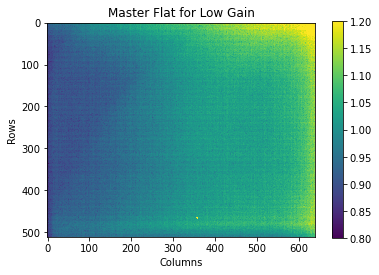

1.0000000000000004
0.06570552725095842


In [13]:
#This code just creates a master flat (dark subtracted), and then normalizes it
master_flat_array = []

# loop over all flats at chosen FPS
for frames in flat_files:
    
    img_file = frames
    arraytype = np.fromfile(img_file, dtype = np.int16)
    arraytype.shape = (512, 640)
    
    # subtract dark
    idx_dark = np.where(cadence_array == fps_flat)[0][0]
    arraytype = np.subtract(arraytype,array_list_darks[idx_dark])        #Subtracting the darks of the corresponding FPS (65)
    master_flat_array.append(arraytype)

# average the dark-subtracted flats
master_flat = np.mean(master_flat_array, axis = 0)     #Can change this to MEDIAN if wanted
master_flat = np.divide(master_flat,np.mean(master_flat))
# We now have a master flat frame, with darks subtracted and then AVERAGED

flat_plot = plt.figure()
flat_plot.add_axes()
plt.title('Master Flat for Low Gain')
plt.xlabel('Columns')
plt.ylabel('Rows')
flat_plot = plt.imshow(master_flat, cmap = 'viridis', interpolation = 'nearest')
plt.colorbar(flat_plot)
plt.clim(0.8, 1.2)

plt.show(flat_plot)
print (np.mean(master_flat))
print (np.std(master_flat))

In [14]:
'''
# save net frame as 3D FITS file

hdu = fits.PrimaryHDU(master_flat_array)
hdul = fits.HDUList([hdu])
hdul.writeto('junk_flat_3d.fits', overwrite=True)
'''

"\n# save net frame as 3D FITS file\n\nhdu = fits.PrimaryHDU(master_flat_array)\nhdul = fits.HDUList([hdu])\nhdul.writeto('junk_flat_3d.fits', overwrite=True)\n"

## Make dark-subtracted "science" Images at different integration times
## (reduced images accumulated into cube)

In [16]:
#This reduces the combined science images of each FPS with the darks of each respective FPS, and then divides by the
#master flat. It also records the mean and variances of each final science image to make a rudimentary gain plot

flat_field = True # do we want to flat-field the images? (not if we're calculating CCD specs)


mean_list = []
variance_list = []

array_list_lin = []     # This is the final output of this block

# loop over integration times
for int_num in range(0,len(cadence_array)):
    
    if flat_field:
        print("Flat-fielding")
    else:
        print("Not flat-fielding")
    

    
    folder_path = path_gain_lin + str(cadence_array[int_num]) # folders
    filenames = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    #print(filenames)
    #print(cadence_array[int_num])
    
    temp_array_list = []
    
    # loop over 'science' frames at this integration time
    #print("Number of science frames at this integration time:",len(filenames))
    
    # loop over frames for given fps is vestigial, since we're just choosing filenames[frame_choice]
    # (we don't want to average them, because we want to preserve frame-to-frame noise)
    frame_choice = 0
    for num_frame in range(frame_choice,frame_choice+1): 
    
        img_file = folder_path + '/' + filenames[num_frame]
        arraytype = np.fromfile(img_file, dtype = np.int16)
        arraytype.shape = (512, 640)
        temp_array_list.append(arraytype)
        
        # save cube of frames at this integration time to check
        '''
        hdu = fits.PrimaryHDU(temp_array_list)
        hdul = fits.HDUList([hdu])
        hdul.writeto("junk_"+str(cadence_array[int_num])+".fits", overwrite=True)
        '''

        ''' 
        # make net frame for this integration time
        mean_lin = np.mean(temp_array_list, axis = 0)    #Can change this to median if wanted
        '''

        #Doing the reduction in this step, replacing divide by 0s with 0s

        # subtract dark from each slice
        sci_minus_dark = np.subtract(arraytype,array_list_darks[int_num])

        # option to divide by flat
        if flat_field:
            final_lin = np.divide(sci_minus_dark, master_flat)
        else:
            final_lin = sci_minus_dark

    # put dark-subtracted frame into cube for this integration time
    array_list_lin.append(final_lin)
        
    # net linearity frame for this integration time
    #net_frame_this_fps = np.mean(array_list_lin, axis=0)


# save as 3D FITS file
file_write_name = "junk_linearity_subt_"+string_gain+"_gain.fits"
hdu = fits.PrimaryHDU(array_list_lin)
hdul = fits.HDUList([hdu])
hdul.writeto(file_write_name, overwrite=True)
print("Wrote",file_write_name)
print("Shape of cube:",np.shape(array_list_lin))

Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding
Flat-fielding


/Users/bandari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Wrote junk_linearity_subt_High_gain.fits
Shape of cube: (20, 512, 640)


In [30]:
# convert to numpy array
array_list_lin_np = np.array(array_list_lin)

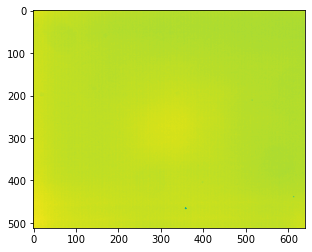

In [28]:
plt.imshow(np.subtract(np.array(array_list_lin)[0,:,:],np.array(array_list_lin)[1,:,:]))
plt.show()

In [36]:
test_array = np.ones(np.shape(array_list_lin_np)[0])
for num_slice in range(0,np.shape(array_list_lin_np)[0]):
    test_array[num_slice] = np.mean(array_list_lin_np[num_slice,:,:])
    

No handles with labels found to put in legend.


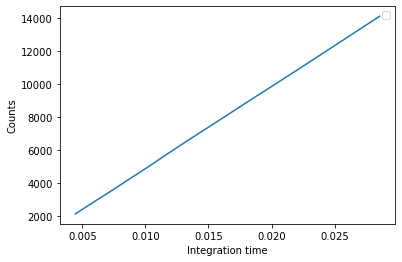

In [37]:
plt.xlabel("Integration time")
plt.ylabel("Counts")
plt.plot(exp_time_array,test_array)
plt.savefig("test_plot.pdf")

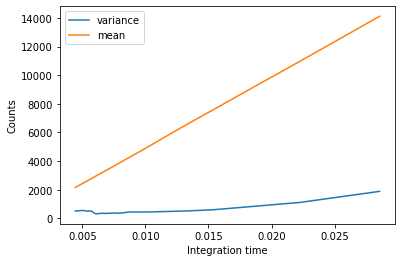

In [85]:
plt.xlabel("Integration time")
plt.ylabel("Counts")
plt.plot(exp_time_array,variance_list,label="variance")
plt.plot(exp_time_array,mean_list,label="mean")
plt.legend()
plt.savefig("test_plot.pdf")

In [81]:
# save as 3D FITS file
#hdu = fits.PrimaryHDU(temp_array_list)
hdu = fits.PrimaryHDU(array_list_lin)
hdul = fits.HDUList([hdu])
hdul.writeto('junk_flat_subt.fits', overwrite=True)

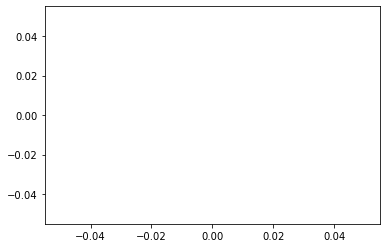

In [49]:
plt.scatter(exp_time_array, variance_list)

In [81]:
#Calculates a linear fit for the slope
equation_fit = np.polyfit(mean_list, variance_list, 1)
print (equation_fit)

print ('The gain is the inverse of the slope, which gives us ' + str(1.0 / equation_fit[0]))

[ 2.29268077e-01 -2.47161200e+02]
The gain is the inverse of the slope, which gives us 4.361706234177038


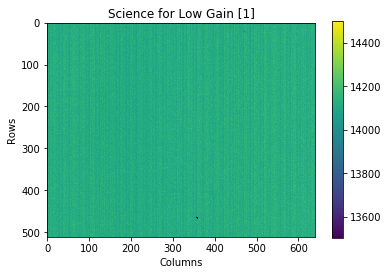

In [82]:
#Just looking at one of the science images (reduced)
lin_plot = plt.figure()
lin_plot.add_axes()
plt.title('Science for Low Gain [1]')
plt.xlabel('Columns')
plt.ylabel('Rows')
lin_plot = plt.imshow(array_list_lin[0], cmap = 'viridis', interpolation = 'nearest')
plt.colorbar(lin_plot)
plt.clim(13500, 14500)

plt.show(lin_plot)